In [1]:
import pandas as pd
from utils import *
years = [2021,2022,2023]
data = pd.read_csv('../full_data_2020.csv')
for year in years:
    data = pd.concat([data, pd.read_csv('../full_data_{}.csv'.format(year))])
data

,station_id,year,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,percentage_docks_available,...,post_code,capacity,mm_precip,temperature,rating,ocio,carriles,time,festius,is_weekend
0,1.0,2020,1.0,1.0,2.0,0.522727,0.503788,0.469697,0.403409,0.354167,...,8013,45,0.0,5.75,6.0,88.0,6.0,2,1,0
1,1.0,2020,1.0,1.0,7.0,0.289773,0.373106,0.304924,0.238636,0.240530,...,8013,45,0.0,4.25,6.0,88.0,6.0,7,1,0
2,1.0,2020,1.0,1.0,12.0,0.253788,0.268939,0.350379,0.344697,0.393939,...,8013,45,0.0,12.45,6.0,88.0,6.0,12,1,0
3,1.0,2020,1.0,1.0,17.0,0.390152,0.346591,0.255814,0.220930,0.186047,...,8013,45,0.0,9.35,6.0,88.0,6.0,17,1,0
4,1.0,2020,1.0,1.0,22.0,0.083333,0.218992,0.437984,0.515504,0.470930,...,8013,45,0.0,6.80,6.0,88.0,6.0,22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815032,519.0,2023,12.0,31.0,1.0,0.913043,0.847826,0.713768,0.731884,0.659420,...,8032,24,0.0,11.10,10.0,52.0,1.0,35041,0,1
815033,519.0,2023,12.0,31.0,6.0,0.648551,0.619565,0.608696,0.608696,0.735507,...,8032,24,0.0,8.95,10.0,52.0,1.0,35046,0,1
815034,519.0,2023,12.0,31.0,11.0,0.826087,0.836957,0.898551,0.939799,1.000000,...,8032,24,0.0,17.35,10.0,52.0,1.0,35051,0,1
815035,519.0,2023,12.0,31.0,16.0,1.000000,1.000000,0.931159,0.923913,0.869565,...,8032,24,0.0,13.85,10.0,52.0,1.0,35056,0,1


In [2]:
data.isna().sum()

station_id                    0
year                          0
month                         0
day                           0
hour                          0
ctx-4                         0
ctx-3                         0
ctx-2                         0
ctx-1                         0
percentage_docks_available    0
lat                           0
lon                           0
altitude                      0
post_code                     0
capacity                      0
mm_precip                     0
temperature                   0
rating                        0
ocio                          0
carriles                      0
time                          0
festius                       0
is_weekend                    0
dtype: int64

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()
X_train = data.drop(['percentage_docks_available'], axis=1)
y_train = data['percentage_docks_available']
X_train = X_train.drop(['station_id'], axis = 1)
X_train_encoded = encode_scale(X_train, encoder = encoder, scaler = scaler, func = 'train')
X_train_encoded

/Users/alejandro/miniconda3/envs/PG/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,post_code_8001,post_code_8002,post_code_8003,post_code_8004,post_code_8005,post_code_8006,post_code_8007,post_code_8008,post_code_8009,post_code_8010,...,lat,lon,altitude,capacity,mm_precip,temperature,rating,ocio,carriles,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.080041,0.477505,-0.589716,2.703885,-0.08509,-1.852814,-1.031464,0.161646,1.003658,-1.856158
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.080041,0.477505,-0.589716,2.703885,-0.08509,-2.080961,-1.031464,0.161646,1.003658,-1.855645
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.080041,0.477505,-0.589716,2.703885,-0.08509,-0.833757,-1.031464,0.161646,1.003658,-1.855131
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.080041,0.477505,-0.589716,2.703885,-0.08509,-1.305261,-1.031464,0.161646,1.003658,-1.854617
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.080041,0.477505,-0.589716,2.703885,-0.08509,-1.693111,-1.031464,0.161646,1.003658,-1.854103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.192506,-0.088541,2.352952,-0.469036,-0.08509,-1.039089,-0.800294,-0.893832,-1.079368,1.744372
815033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.192506,-0.088541,2.352952,-0.469036,-0.08509,-1.366100,-0.800294,-0.893832,-1.079368,1.744886
815034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.192506,-0.088541,2.352952,-0.469036,-0.08509,-0.088476,-0.800294,-0.893832,-1.079368,1.745400
815035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.192506,-0.088541,2.352952,-0.469036,-0.08509,-0.620819,-0.800294,-0.893832,-1.079368,1.745914


In [4]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(n_estimators=250, learning_rate=0.05, n_jobs=10)

scores = cross_validation_model(X = X_train_encoded, y = y_train, k = 5, model = xgbr)

In [5]:
scores

{'r2_mean': 0.8595582175010692,
 'r2_std': 0.00033597136261088935,
 'mse_mean': 0.011410851973842489,
 'mse_std': 2.8543036182515593e-05}

In [6]:
df_test = pd.read_csv('../full_data_2024.csv')
#y_test = X_test['percentage_docks_available']
X_test = df_test.drop(['percentage_docks_available'], axis=1)
X_test = X_test.drop(['station_id'], axis = 1)
X_test_encoded = encode_scale(X_test, encoder = encoder, scaler = scaler, func = 'test')
X_test_encoded

,post_code_8001,post_code_8002,post_code_8003,post_code_8004,post_code_8005,post_code_8006,post_code_8007,post_code_8008,post_code_8009,post_code_8010,...,lat,lon,altitude,capacity,mm_precip,temperature,rating,ocio,carriles,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.080041,0.477505,-0.589716,2.703885,-0.085090,-1.381310,-1.031464,0.161646,1.003658,1.747249
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.080041,0.477505,-0.589716,2.703885,-0.085090,-1.031484,-1.031464,0.161646,1.003658,1.747763
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.080041,0.477505,-0.589716,2.703885,-0.085090,-0.795732,-1.031464,0.161646,1.003658,1.748277
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.080041,0.477505,-0.589716,2.703885,-0.085090,-1.457359,-1.031464,0.161646,1.003658,1.748791
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.198829,0.358363,-0.558411,0.286421,-0.085090,-1.350890,-1.031464,0.161646,1.003658,1.747044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.248360,0.260069,-0.057531,-1.375585,-0.085090,-0.544770,-0.858087,-0.542006,-1.079368,1.968795
171898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.248360,0.260069,-0.057531,-1.375585,-0.085090,-0.430697,-0.858087,-0.542006,-1.079368,1.969309
171899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.248360,0.260069,-0.057531,-1.375585,-0.085090,-0.514351,-0.858087,-0.542006,-1.079368,1.969823
171900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.248360,0.260069,-0.057531,-1.375585,1.410988,-0.788127,-0.858087,-0.542006,-1.079368,1.970337


In [7]:
y_pred = xgbr.predict(X_test_encoded)
y_pred = pd.DataFrame(y_pred, columns = ['percentage_docks_available']).reset_index()
y_pred

,index,percentage_docks_available
0,0,0.781468
1,1,0.733914
2,2,0.850968
3,3,0.856995
4,4,0.605520
...,...,...
171897,171897,0.817814
171898,171898,0.763176
171899,171899,0.236942
171900,171900,0.357958


In [9]:
submission = y_pred.to_csv('../submision_xgbr.csv', index = False)

In [8]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

In [11]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Resumen del modelo
model.summary()

/Users/alejandro/miniconda3/envs/PG/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,817 (73.50 KB)

 Trainable params: 18,817 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
X_train.isna().sum()

post_code_8001    0
post_code_8002    0
post_code_8003    0
post_code_8004    0
post_code_8005    0
                 ..
temperature       0
rating            0
ocio              0
carriles          0
time              0
Length: 65, dtype: int64

In [13]:
# Entrenar el modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

Epoch 1/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 29s 432us/step - loss: 0.0134 - val_loss: 0.0117
Epoch 2/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 27s 419us/step - loss: 0.0117 - val_loss: 0.0115
Epoch 3/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 28s 428us/step - loss: 0.0114 - val_loss: 0.0118
Epoch 4/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 27s 417us/step - loss: 0.0113 - val_loss: 0.0113
Epoch 5/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 27s 416us/step - loss: 0.0113 - val_loss: 0.0114
Epoch 6/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 27s 417us/step - loss: 0.0112 - val_loss: 0.0112
Epoch 7/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 27s 415us/step - loss: 0.0112 - val_loss: 0.0112
Epoch 8/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 27s 417us/step - loss: 0.0110 - val_loss: 0.0111
Epoch 9/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 27s 415us/step - loss: 0.0111 - val_loss: 0.0112
Epoch 10/10
65500/65500 ━━━━━━━━━━━━━━━━━━━━ 26s 404us/step - loss: 0.0110 - val_loss: 0.0112
20469/20469 ━━━━━━━━━━━━━━━━━━━━ 4s 197us/step - loss: 0.0112
Loss: 0

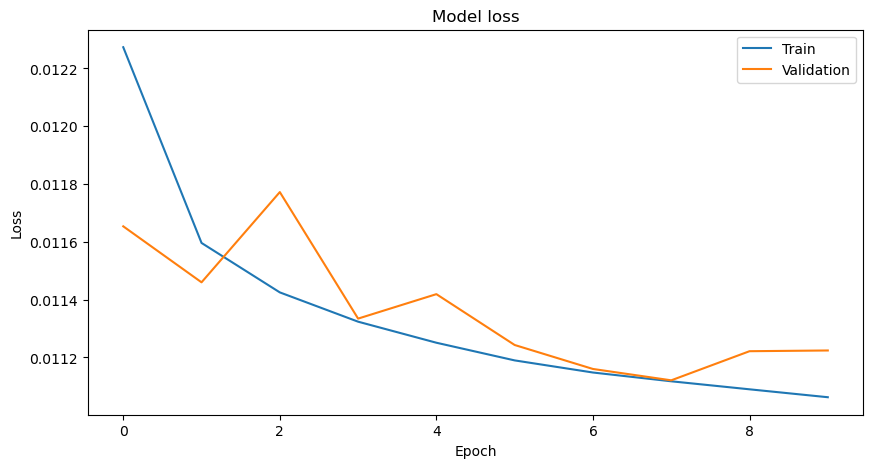

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [16]:
y_pred = model.predict(X_test_encoded)
y_pred = pd.DataFrame(y_pred, columns = ['percentage_docks_available']).reset_index()
y_pred

5372/5372 ━━━━━━━━━━━━━━━━━━━━ 1s 207us/step


,index,percentage_docks_available
0,0,0.772751
1,1,0.747390
2,2,0.858451
3,3,0.869570
4,4,0.619464
...,...,...
171897,171897,0.817850
171898,171898,0.803827
171899,171899,0.290441
171900,171900,0.347187


In [17]:
submission = y_pred.to_csv('../submision_nn.csv', index = False)